# E-static Rectangular Element
---

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [2]:
from gpt.estatic import Erect
from gpt.lattice import Lattice

from gpt import GPT

from pmd_beamphysics import single_particle

In [3]:
a=0.1
b=0.2
L=0.5
E0=1e6

E = Erect('ER', a, b, L, E0)
E.place()
E._E0

1000000.0 erect
werd ER


1000000.0

In [4]:
E.gpt_lines()

['\n#***********************************************',
 '#             Erect: ER           ',
 '#***********************************************',
 'ER_a = 0.1;',
 'ER_b = 0.2;',
 'ER_L = 0.5;',
 'ER_E = 1000000.0;',
 '\nerect("wcs", "LxyzXYZ", 0, 0, 0.25, 0, 0, 0,  ER_a, ER_b, ER_L, ER_E);']

In [5]:
lat = Lattice('etest')


lat.add(Erect('ER', a, b, L, E0, global_element=True), ds=1.0, element_origin='beg')

#lat.plot_floor()



1000000.0 erect
werd ER


In [6]:
x = lat['ER']
x._E0

1000000.0

In [7]:
lat.write_gpt_lines(output_file='gpt.temp.in')

not a bend
no source data
not a bend
no source data


['\n',
 'setfile("beam", "gpt_particles.gdf");\n',
 'time=0.0;\n',
 '\n',
 'auto_phase=0.0;\n',
 'space_charge=0.0;\n',
 'cathode=0.0;\n',
 'space_charge_type=1.0;\n',
 'RadiusMax=0.04;\n',
 'GBacc=5.5;\n',
 'xacc=6.5;\n',
 'accuracy(GBacc, xacc);\n',
 'dtmin=1e-16;\n',
 'dtmax=1e-10;\n',
 ' \n',
 'Alpha=1.0;\n',
 'Fn=0.5;\n',
 'verror=0.005;\n',
 'Nstd=5.0;\n',
 'tree_code_theta=1.0;\n',
 'tree_code_R=1e-06;\n',
 'if (space_charge == 1) {\n',
 '\n',
 '    if (space_charge_type == 1) {\n',
 '        if(cathode == 1) {\n',
 '            spacecharge3Dmesh("Cathode", "MeshNfac", Alpha, "MeshAdapt", Fn, "SolverAcc", verror, "MeshBoxSize", Nstd);\n',
 '        } else {\n',
 '            spacecharge3Dmesh("MeshNfac", Alpha, "MeshAdapt", Fn, "SolverAcc", verror, "MeshBoxSize", Nstd);\n',
 '        }\n',
 '    }\n',
 '    if (space_charge_type == 2) {\n',
 '        setrmacrodist("beam","u",tree_code_R,0) ;\n',
 '        spacecharge3Dtree(tree_code_theta) ;   }\n',
 '        \n',
 '    #if (spa

In [8]:
G = GPT('gpt.temp.in', initial_particles=single_particle(pz=10e6))
G.run()

In [9]:
print(G)


GPT object:
   Original input file: gpt.temp.in
   Template location: /Users/colwyngulliford/GitHub/lume-gpt/examples/elements
   Use temp directory: True

Run Control
   Run configured: True
   Work location: /var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpw0v4qas7
   Timeout: None (sec)

Results
   Finished: True
   Error occured: False
   Run time: 0.022209882736206055 (sec)


In [10]:
from matplotlib import pyplot as plt

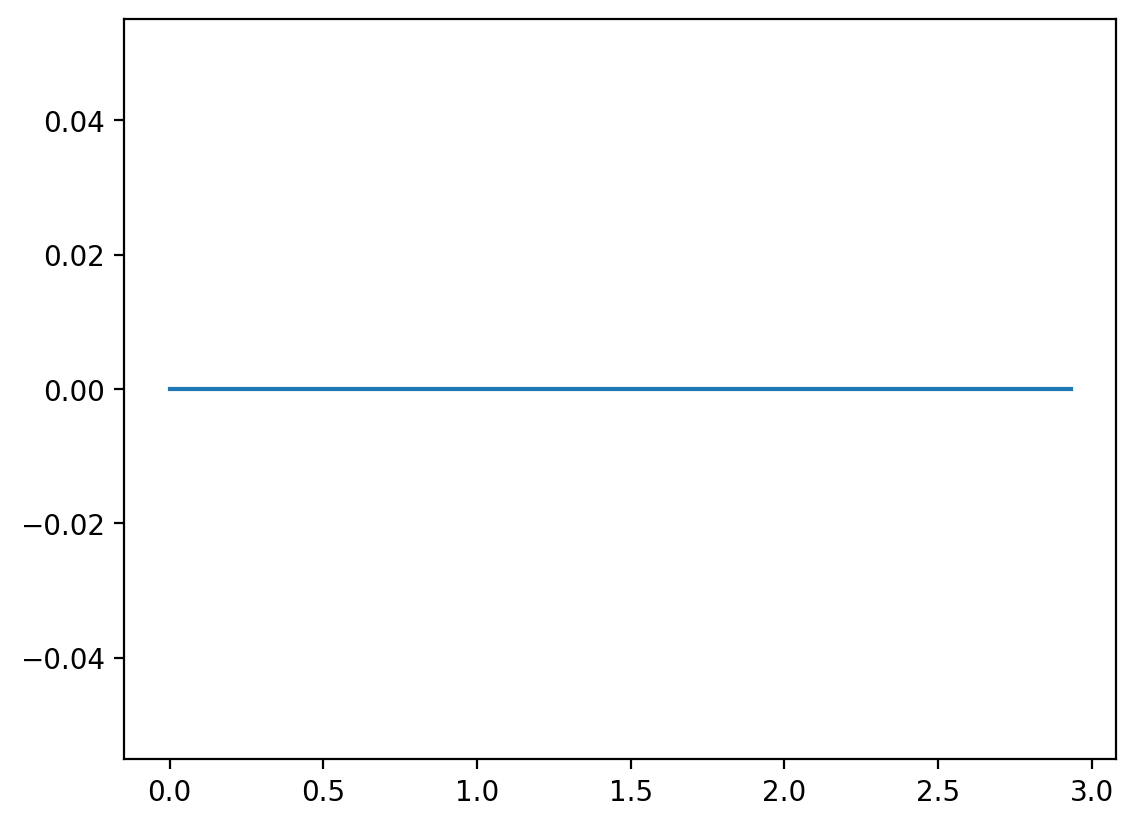

In [11]:
plt.plot(G.tout_stat('mean_z'), G.tout_stat('mean_x'))

In [12]:
#G.tout_stat('mean_x')